In [1]:
import pandas as pd
from nltk import re
import numpy as np
import keras.layers
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Bidirectional, GlobalAveragePooling1D, GlobalMaxPooling1D, Conv1D, Activation
from keras.layers.merge import concatenate
from keras.models import Model
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import html
import string
import time
import nltk
from keras.callbacks import EarlyStopping,TensorBoard,ModelCheckpoint

In [2]:
import csv
df = pd.read_csv('news.csv', lineterminator = '\n')

In [3]:
df

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [4]:
df.dropna(axis=0,inplace=True)

In [5]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
def convert_lower(text):
    lower_text = text.lower()
    return lower_text

df["text"] = df['text'].apply(lambda x: convert_lower(x))

# removing punctuation

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

df["text"] = df['text'].apply(remove_punctuations)

# removing numbers

df['text'] = df['text'].str.replace('\d+', '')

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Karthik Ram
[nltk_data]     Srinivas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [8]:
#tokenization

df['tokenized_text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

In [9]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Karthik Ram
[nltk_data]     Srinivas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# removing stopwrods

stopwords = nltk.corpus.stopwords.words("english")

def stopwords_remove(text):
    text_cleaned = [word for word in text if word not in stopwords]
    return text_cleaned

df["tokenized_text"] = df["tokenized_text"].apply(lambda x: stopwords_remove(x))

In [11]:
# removing stopwrods

stopwords = nltk.corpus.stopwords.words("english")

def stopwords_remove(text):
    text_cleaned = [word for word in text if word not in stopwords]
    return text_cleaned

df["tokenized_text"] = df["tokenized_text"].apply(lambda x: stopwords_remove(x))

In [12]:
df

,Unnamed: 0,title,text,label,tokenized_text
0,8476,You Can Smell Hillary’s Fear,daniel greenfield a shillman journalism fellow...,FAKE,"[daniel, greenfield, shillman, journalism, fel..."
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st..."
2,3608,Kerry to go to Paris in gesture of sympathy,us secretary of state john f kerry said monday...,REAL,"[us, secretary, state, john, f, kerry, said, m..."
3,10142,Bernie supporters on Twitter erupt in anger ag...,— kaydee king kaydeeking november the lesson...,FAKE,"[—, kaydee, king, kaydeeking, november, lesson..."
4,875,The Battle of New York: Why This Primary Matters,its primary day in new york and frontrunners h...,REAL,"[primary, day, new, york, frontrunners, hillar..."
...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,the state department told the republican natio...,REAL,"[state, department, told, republican, national..."
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,the ‘p’ in pbs should stand for ‘plutocratic’ ...,FAKE,"[‘, p, ’, pbs, stand, ‘, plutocratic, ’, ‘, pe..."
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,antitrump protesters are tools of the oligarc...,FAKE,"[antitrump, protesters, tools, oligarchy, ref..."
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...",addis ababa ethiopia —president obama convened...,REAL,"[addis, ababa, ethiopia, —president, obama, co..."


In [13]:
input2_corrected = [" ".join(x) for x in df['tokenized_text']]

from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf_vectorizer=TfidfVectorizer(use_idf=True) 
 

tfidf_vectorizer_vectors=tfidf_vectorizer.fit_transform(input2_corrected)

In [14]:
tfidf_vectorizer_vectors

<6335x79153 sparse matrix of type '<class 'numpy.float64'>'
	with 1761750 stored elements in Compressed Sparse Row format>

In [15]:
def dummies(x):
    if x == 'FAKE':
        return 1
    if x == 'REAL':
        return 2

df['lable'] = df['label'].apply(lambda x: dummies(x))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_vectorizer_vectors, df['label'], test_size=0.3, random_state=101)

In [17]:
df

,Unnamed: 0,title,text,label,tokenized_text,lable
0,8476,You Can Smell Hillary’s Fear,daniel greenfield a shillman journalism fellow...,FAKE,"[daniel, greenfield, shillman, journalism, fel...",1
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st...",1
2,3608,Kerry to go to Paris in gesture of sympathy,us secretary of state john f kerry said monday...,REAL,"[us, secretary, state, john, f, kerry, said, m...",2
3,10142,Bernie supporters on Twitter erupt in anger ag...,— kaydee king kaydeeking november the lesson...,FAKE,"[—, kaydee, king, kaydeeking, november, lesson...",1
4,875,The Battle of New York: Why This Primary Matters,its primary day in new york and frontrunners h...,REAL,"[primary, day, new, york, frontrunners, hillar...",2
...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,the state department told the republican natio...,REAL,"[state, department, told, republican, national...",2
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,the ‘p’ in pbs should stand for ‘plutocratic’ ...,FAKE,"[‘, p, ’, pbs, stand, ‘, plutocratic, ’, ‘, pe...",1
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,antitrump protesters are tools of the oligarc...,FAKE,"[antitrump, protesters, tools, oligarchy, ref...",1
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...",addis ababa ethiopia —president obama convened...,REAL,"[addis, ababa, ethiopia, —president, obama, co...",2


In [18]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1500)
classifier.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1500)

In [19]:
randomforest_predict = classifier.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,randomforest_predict))
print(classification_report(y_test,randomforest_predict))
print(accuracy_score(y_test, randomforest_predict))

[[868  75]
 [ 92 866]]
              precision    recall  f1-score   support

        FAKE       0.90      0.92      0.91       943
        REAL       0.92      0.90      0.91       958

    accuracy                           0.91      1901
   macro avg       0.91      0.91      0.91      1901
weighted avg       0.91      0.91      0.91      1901

0.9121514992109416


In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='sag')

lr.fit(X_train,y_train)
logistic_predictions = lr.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,logistic_predictions))
print(classification_report(y_test,logistic_predictions))
print(accuracy_score(y_test, logistic_predictions))

[[899  44]
 [124 834]]
              precision    recall  f1-score   support

        FAKE       0.88      0.95      0.91       943
        REAL       0.95      0.87      0.91       958

    accuracy                           0.91      1901
   macro avg       0.91      0.91      0.91      1901
weighted avg       0.91      0.91      0.91      1901

0.911625460284061


In [23]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()

MNB.fit(X_train, y_train)
predicted = MNB.predict(X_test)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))
print(accuracy_score(y_test, predicted))

[[634 309]
 [ 14 944]]
              precision    recall  f1-score   support

        FAKE       0.98      0.67      0.80       943
        REAL       0.75      0.99      0.85       958

    accuracy                           0.83      1901
   macro avg       0.87      0.83      0.83      1901
weighted avg       0.87      0.83      0.83      1901

0.8300894266175697


In [25]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train,y_train)
predictions = svc_model.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[910  33]
 [117 841]]
              precision    recall  f1-score   support

        FAKE       0.89      0.97      0.92       943
        REAL       0.96      0.88      0.92       958

    accuracy                           0.92      1901
   macro avg       0.92      0.92      0.92      1901
weighted avg       0.92      0.92      0.92      1901

0.9210941609679116


In [27]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

df['scores'] = df['text'].apply(lambda text: sid.polarity_scores(text))

df.head()
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

[nltk_data] Downloading package vader_lexicon to C:\Users\Karthik Ram
[nltk_data]     Srinivas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [28]:
df

,Unnamed: 0,title,text,label,tokenized_text,lable,scores,compound
0,8476,You Can Smell Hillary’s Fear,daniel greenfield a shillman journalism fellow...,FAKE,"[daniel, greenfield, shillman, journalism, fel...",1,"{'neg': 0.181, 'neu': 0.732, 'pos': 0.087, 'co...",-0.9994
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st...",1,"{'neg': 0.076, 'neu': 0.835, 'pos': 0.09, 'com...",0.7723
2,3608,Kerry to go to Paris in gesture of sympathy,us secretary of state john f kerry said monday...,REAL,"[us, secretary, state, john, f, kerry, said, m...",2,"{'neg': 0.055, 'neu': 0.851, 'pos': 0.094, 'co...",0.9595
3,10142,Bernie supporters on Twitter erupt in anger ag...,— kaydee king kaydeeking november the lesson...,FAKE,"[—, kaydee, king, kaydeeking, november, lesson...",1,"{'neg': 0.079, 'neu': 0.829, 'pos': 0.092, 'co...",0.6681
4,875,The Battle of New York: Why This Primary Matters,its primary day in new york and frontrunners h...,REAL,"[primary, day, new, york, frontrunners, hillar...",2,"{'neg': 0.098, 'neu': 0.72, 'pos': 0.183, 'com...",0.9882
...,...,...,...,...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,the state department told the republican natio...,REAL,"[state, department, told, republican, national...",2,"{'neg': 0.039, 'neu': 0.919, 'pos': 0.042, 'co...",0.4404
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,the ‘p’ in pbs should stand for ‘plutocratic’ ...,FAKE,"[‘, p, ’, pbs, stand, ‘, plutocratic, ’, ‘, pe...",1,"{'neg': 0.135, 'neu': 0.753, 'pos': 0.112, 'co...",-0.9979
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,antitrump protesters are tools of the oligarc...,FAKE,"[antitrump, protesters, tools, oligarchy, ref...",1,"{'neg': 0.143, 'neu': 0.768, 'pos': 0.089, 'co...",-0.9990
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...",addis ababa ethiopia —president obama convened...,REAL,"[addis, ababa, ethiopia, —president, obama, co...",2,"{'neg': 0.06, 'neu': 0.828, 'pos': 0.112, 'com...",0.9963


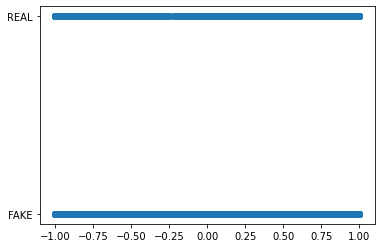

In [29]:
import matplotlib.pyplot as plt
plt.scatter(df['compound'],df["label"])

In [30]:
import pandas as pd
import tensorflow as tf

In [31]:
df.head()


,Unnamed: 0,title,text,label,tokenized_text,lable,scores,compound
0,8476,You Can Smell Hillary’s Fear,daniel greenfield a shillman journalism fellow...,FAKE,"[daniel, greenfield, shillman, journalism, fel...",1,"{'neg': 0.181, 'neu': 0.732, 'pos': 0.087, 'co...",-0.9994
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st...",1,"{'neg': 0.076, 'neu': 0.835, 'pos': 0.09, 'com...",0.7723
2,3608,Kerry to go to Paris in gesture of sympathy,us secretary of state john f kerry said monday...,REAL,"[us, secretary, state, john, f, kerry, said, m...",2,"{'neg': 0.055, 'neu': 0.851, 'pos': 0.094, 'co...",0.9595
3,10142,Bernie supporters on Twitter erupt in anger ag...,— kaydee king kaydeeking november the lesson...,FAKE,"[—, kaydee, king, kaydeeking, november, lesson...",1,"{'neg': 0.079, 'neu': 0.829, 'pos': 0.092, 'co...",0.6681
4,875,The Battle of New York: Why This Primary Matters,its primary day in new york and frontrunners h...,REAL,"[primary, day, new, york, frontrunners, hillar...",2,"{'neg': 0.098, 'neu': 0.72, 'pos': 0.183, 'com...",0.9882


In [32]:
print(X_train)

  (0, 658)	0.04562993684800722
  (0, 688)	0.04656473896875831
  (0, 1278)	0.02846567073047119
  (0, 1613)	0.07630579426792916
  (0, 2392)	0.025042993217759504
  (0, 2649)	0.05304827977636628
  (0, 2755)	0.0878382434208224
  (0, 2906)	0.02322892788279015
  (0, 3419)	0.03037221435240569
  (0, 3672)	0.1610329718977975
  (0, 3746)	0.0854958413870285
  (0, 4895)	0.05249077066576394
  (0, 5905)	0.03233904602995097
  (0, 6377)	0.13408620253996903
  (0, 6384)	0.029456080402688805
  (0, 7973)	0.09958498858802102
  (0, 8968)	0.03559603802774948
  (0, 8994)	0.07630579426792916
  (0, 9028)	0.0878382434208224
  (0, 10269)	0.05204778140793911
  (0, 10471)	0.02757755152418388
  (0, 10952)	0.041904663505298916
  (0, 11750)	0.11385924128324908
  (0, 12026)	0.06311843532047302
  (0, 12073)	0.03527521309663551
  :	:
  (4433, 69929)	0.02779100697008832
  (4433, 70018)	0.03489907698222918
  (4433, 70138)	0.0625836605463025
  (4433, 70466)	0.08068115482808606
  (4433, 72363)	0.02780057896780742
  (4433, 724

In [33]:
print(y_train)

3655    FAKE
5805    FAKE
5957    REAL
2055    FAKE
77      REAL
        ... 
599     FAKE
5695    REAL
1361    FAKE
1547    FAKE
4959    REAL
Name: label, Length: 4434, dtype: object
